In [119]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [120]:
import numpy as np
from pylamp.loss.losses import CrossEntropyLoss
from pylamp.neural.sequential import Sequential
from pylamp.neural.layers import Linear, Conv1D, MaxPool1D, Flatten
from pylamp.optim.optimizer import Optim
from pylamp.neural.activations import ReLU
from pylamp.optim.optimizer import SGD
from pylamp.utils.usps import load_usps
from pylamp.utils.plotter import Display

## Loading Data

In [121]:
uspsdatatrain = "./data/USPS/USPS_train.txt"
uspsdatatest = "./data/USPS/USPS_test.txt"
X_train, y_train = load_usps(uspsdatatrain)
X_test, y_test = load_usps(uspsdatatest)

In [122]:
def normalize_data(X, mean=None, std=None):
    if mean is None:
        mean = np.mean(X, axis=0)
        std = np.std(X, axis=0)
    return (X - mean) / std, mean, std

def one_hot_encode(y):
    return np.eye(10)[y]

X_train, mean, std = normalize_data(X_train)
X_test, _, _ = normalize_data(X_test, mean, std)

y_train = one_hot_encode(y_train)
y_test = one_hot_encode(y_test)

In [123]:
model = Sequential()
model.add_module(Conv1D(kernel_size=3, in_channels=1, out_channels=32, strides=1))
model.add_module(MaxPool1D(kernel_size=2, strides=2))
model.add_module(Flatten())
model.add_module(Linear(4064,100))
model.add_module(ReLU())
model.add_module(Linear(100,10))

loss = CrossEntropyLoss()
optimizer_model = Optim(model, loss, 1e-4)
model_losses = SGD(optimizer_model, X_train, y_train, batch_size=32, epochs=20, verbose=True, add_channel_x=True, add_channel_y=False)

Epoch 1/20, Average Loss: 1.873080267933117


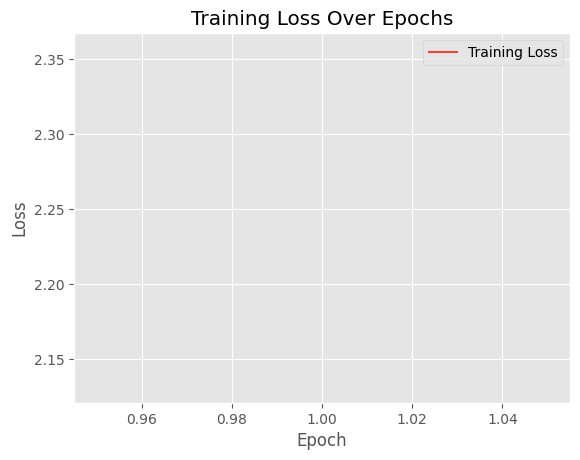

In [ ]:
Display.plot_loss(model_losses)